In [271]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Analisis del sistema a r=cte

Trayectoria del sistema

1.5707963267948966

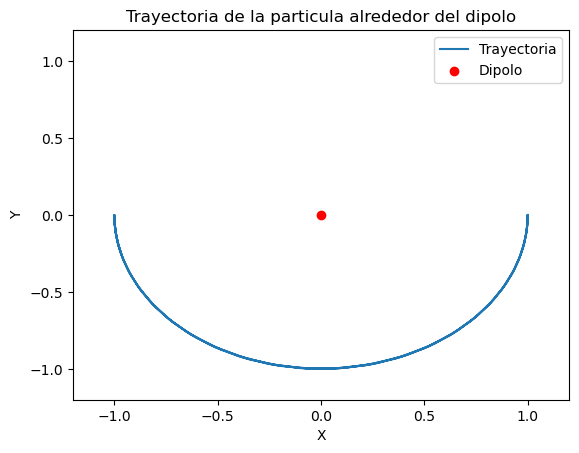

In [228]:
t_0=np.linspace(0,10,100)
f=(np.pi/2)*np.cos(t_0)
x_c=np.sin(f)
y_c=-np.cos(f)
plt.plot(x_c,y_c,label="Trayectoria")
plt.title("Trayectoria de la particula alrededor del dipolo")
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.ylabel('Y')
plt.xlabel('X')
plt.scatter(0,0,c="r",label="Dipolo")
plt.legend()
f[0]

Velocidades iniciales

C:\Users\USER\AppData\Local\Temp\ipykernel_6648\4069721678.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(a,np.sqrt(np.cos(a)))


Text(0.5, 0, '$θ$')

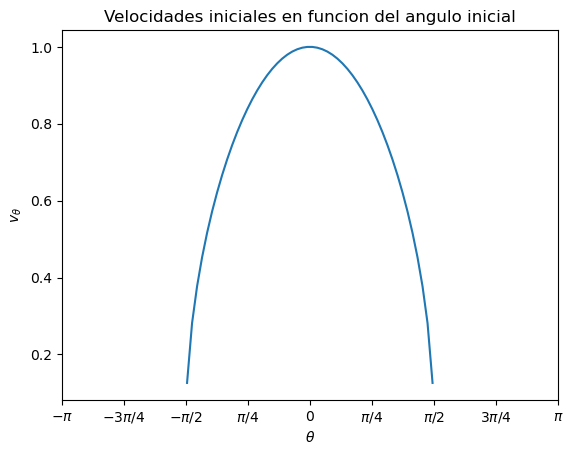

In [229]:
a=np.linspace(-np.pi,np.pi,100)
plt.plot(a,np.sqrt(np.cos(a)))
plt.xticks(np.array([-np.pi,-3*np.pi/4,-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]),
           ['$-\pi$','$-3\pi/4$','$-\pi/2$', '$\pi/4$', '$0$', '$\pi/4$', '$\pi/2$','$3\pi/4$','$\pi$'])
plt.title("Velocidades iniciales en funcion del angulo inicial")
plt.ylabel("$v_{\u03B8}$")
plt.xlabel("$\u03B8$")

Diagrama de fases r cte

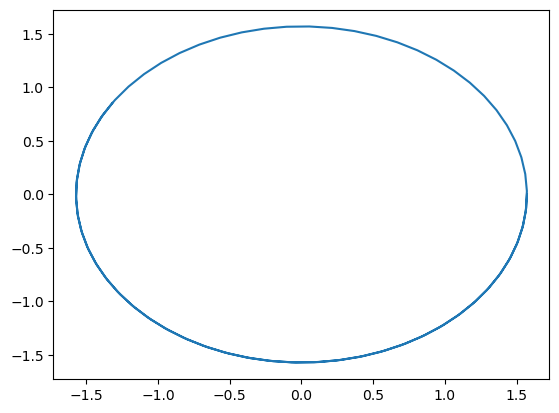

In [230]:
def fun(t):
    return (np.pi/2)*np.cos(t)
def df(f,r,h=1e-4):
    return (f(r+h)-f(r-h))/(2*h)
plt.plot(fun(t_0),df(fun,t_0))


Analisis del sistema r variable

In [231]:
#Se definen las variables y coordenadas que parametrizaran el comportamiento del sistema
t, k = smp.symbols('t k')
p, q = smp.symbols('p q')
m =smp.symbols('m')

theta,r =smp.symbols(r'\theta, r', cls=smp.Function)
theta = theta(t)
r= r(t)
theta_d = smp.diff(theta, t)
r_d = smp.diff(r, t)
theta_dd = smp.diff(theta_d, t)
r_dd = smp.diff(r_d, t)
x = r*smp.sin(theta)
y = -r*smp.cos(theta)


In [232]:
#Se plantean las ecuaciones de energias necesarias para encontrar el lagrangiano
# Kinetic
T = 1/2 * m * (smp.diff(x, t)**2 + smp.diff(y, t)**2)

# Potential
V = -k*(p*q*smp.cos(theta))/(r**2)
# Lagrangian
L = T-V

In [233]:
L #Ecuacion resultante

k*p*q*cos(\theta(t))/r(t)**2 + 0.5*m*((r(t)*sin(\theta(t))*Derivative(\theta(t), t) - cos(\theta(t))*Derivative(r(t), t))**2 + (r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))**2)

In [234]:
#Se plantea la ecuacion de euler lagrange para cada una de las coordenadas, este metodo asume directamente que las ecuaciones resultantes son=0
LE_theta = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t).simplify()
LE_r = smp.diff(L, r) - smp.diff(smp.diff(L, r_d), t).simplify()

In [235]:
LE_theta

-k*p*q*sin(\theta(t))/r(t)**2 + 0.5*m*((-2*r(t)*sin(\theta(t))*Derivative(\theta(t), t) + 2*cos(\theta(t))*Derivative(r(t), t))*(r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t)) + (r(t)*sin(\theta(t))*Derivative(\theta(t), t) - cos(\theta(t))*Derivative(r(t), t))*(2*r(t)*cos(\theta(t))*Derivative(\theta(t), t) + 2*sin(\theta(t))*Derivative(r(t), t))) - m*(1.0*r(t)*Derivative(\theta(t), (t, 2)) + 2.0*Derivative(\theta(t), t)*Derivative(r(t), t))*r(t)

In [236]:
LE_r

-2*k*p*q*cos(\theta(t))/r(t)**3 + 0.5*m*(2*(r(t)*sin(\theta(t))*Derivative(\theta(t), t) - cos(\theta(t))*Derivative(r(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*(r(t)*cos(\theta(t))*Derivative(\theta(t), t) + sin(\theta(t))*Derivative(r(t), t))*cos(\theta(t))*Derivative(\theta(t), t)) - 1.0*m*Derivative(r(t), (t, 2))

In [237]:
#Se obtiene una serie de soluciones para las segundas derivadas de cada una de las coordenadas
sols = smp.solve([LE_theta, LE_r], (theta_dd, r_dd),
                simplify=False, rational=False)

In [238]:
sols[r_dd] #r_dd=

-2.0*k*p*q*cos(\theta(t))/(m*r(t)**3) + 1.0*r(t)*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + 1.0*r(t)*cos(\theta(t))**2*Derivative(\theta(t), t)**2

In [239]:
sols[theta_dd] #theta_dd=

-1.0*k*p*q*sin(\theta(t))/(m*r(t)**4) - 2.0*Derivative(\theta(t), t)*Derivative(r(t), t)/r(t)

In [240]:
dz1dt_f = smp.lambdify((t,k,m,p,q,theta,r,theta_d,r_d), sols[theta_dd])
dz2dt_f = smp.lambdify((t,k,m,p,q,theta,r,theta_d,r_d), sols[r_dd])
dthe1dt_f = smp.lambdify(theta_d, theta_d)
dthe2dt_f = smp.lambdify(r_d, r_d)

In [241]:
def dSdt(S, t, k,m,p,q):
    theta, z1, r, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t,k,m,p,q,theta,r, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t,k,m,p,q,theta,r, z1, z2),
    ]

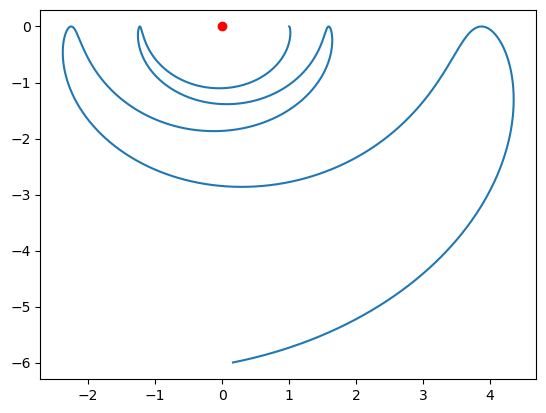

In [284]:
k=1
t = np.linspace(0, 100, 10000)
m=1
p=1
q=1
ans = odeint(dSdt, y0=[np.pi/2, 0, 1,0.05], t=t, args=(k,m,p,q))
Theta_n=ans.T[0]
r_n=ans.T[2]
y_n=-r_n*np.cos(Theta_n)
x_n=r_n*np.sin(Theta_n)
plt.plot(x_n,y_n)
plt.scatter(0,0,c="r",label="Dipolo")

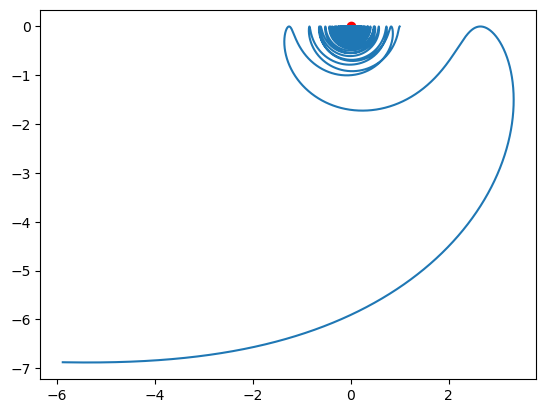

In [285]:
ans_2 = odeint(dSdt, y0=[np.pi/2, 0, 1,-0.05], t=t, args=(k,m,p,q))
Theta_n2=ans_2.T[0]
r_n2=ans_2.T[2]
y_n2=-r_n2*np.cos(Theta_n2)
x_n2=r_n2*np.sin(Theta_n2)
plt.plot(x_n2,y_n2)
plt.scatter(0,0,c="r",label="Dipolo")

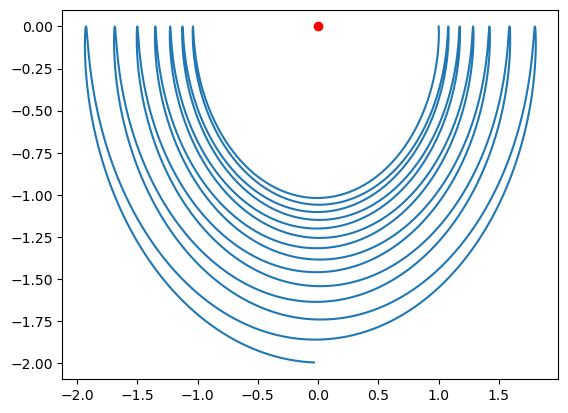

In [297]:
ans_3 = odeint(dSdt, y0=[np.pi/2, 0, 1,0.01], t=t, args=(k,m,p,q))
Theta_n3=ans_3.T[0]
r_n3=ans_3.T[2]
y_n3=-r_n3*np.cos(Theta_n3)
x_n3=r_n3*np.sin(Theta_n3)
plt.plot(x_n3,y_n3)
plt.scatter(0,0,c="r",label="Dipolo")

C:\Users\USER\AppData\Local\Temp\ipykernel_6648\800997165.py:4: RuntimeWarning: invalid value encountered in multiply
  y_n4=-r_n4*np.cos(Theta_n4)
C:\Users\USER\AppData\Local\Temp\ipykernel_6648\800997165.py:5: RuntimeWarning: invalid value encountered in multiply
  x_n4=r_n4*np.sin(Theta_n4)


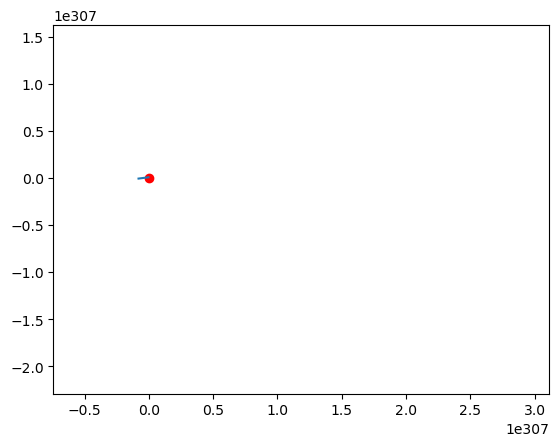

In [308]:
ans_4 = odeint(dSdt, y0=[np.pi/4, np.sqrt(np.cos(np.pi/4)), 1,0], t=t, args=(k,m,p,q))
Theta_n4=ans_4.T[0]
r_n4=ans_4.T[2]
y_n4=-r_n4*np.cos(Theta_n4)
x_n4=r_n4*np.sin(Theta_n4)
plt.plot(x_n4,y_n4)
plt.scatter(0,0,c="r",label="Dipolo")

In [244]:
Theta_n[0],r_n[0],y_n[0],x_n[0]

(1.5707963267948966, 1.0, -6.123233995736766e-17, 1.0)

array([ 1.57079633,  1.56979573,  1.56879413, ..., -0.66345381,
       -0.6634697 , -0.6634856 ])

In [303]:
np.sqrt(np.cos(np.pi/4))

0.8408964152537146